$$ Ahmed \space Azzam $$

$$ Delay \space Task  \ $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('flights.csv')

In [3]:
df.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DISTANCE
0,1,1,MQ,3303,N678MQ,DFW,GJT,133.0,0,NaN,0.0,0.0,22.0,22.0,0.0,773
1,1,1,NK,295,N521NK,ORD,IAH,167.0,0,NaN,26.0,0.0,0.0,0.0,0.0,925
2,1,1,OO,2610,N866AS,LAX,FAT,55.0,0,NaN,NaN,NaN,NaN,NaN,NaN,209
3,1,1,OO,5343,N584SW,LAX,SBP,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN,156
4,1,1,OO,4443,N455SW,CVG,MKE,83.0,0,NaN,NaN,NaN,NaN,NaN,NaN,318


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581746 entries, 0 to 581745
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                581746 non-null  int64  
 1   DAY                  581746 non-null  int64  
 2   AIRLINE              581746 non-null  object 
 3   FLIGHT_NUMBER        581746 non-null  int64  
 4   TAIL_NUMBER          580318 non-null  object 
 5   ORIGIN_AIRPORT       581746 non-null  object 
 6   DESTINATION_AIRPORT  581746 non-null  object 
 7   SCHEDULED_TIME       581742 non-null  float64
 8   Flight_Status        581746 non-null  int64  
 9   CANCELLATION_REASON  10988 non-null   object 
 10  AIR_SYSTEM_DELAY     136064 non-null  float64
 11  SECURITY_DELAY       136064 non-null  float64
 12  AIRLINE_DELAY        136064 non-null  float64
 13  LATE_AIRCRAFT_DELAY  136064 non-null  float64
 14  WEATHER_DELAY        136064 non-null  float64
 15  DISTANCE         

## Note

- Assuming that the question is required the ratio of delay of each flight, this is result.

In [5]:
df['Total_Delay']=df.iloc[:,[10,11,12,13,14]].sum(axis=1)

In [6]:
df['Delay_to_flight_time_ratio']= df['Total_Delay']/df['SCHEDULED_TIME']

In [7]:
df.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DISTANCE,Total_Delay,Delay_to_flight_time_ratio
0,1,1,MQ,3303,N678MQ,DFW,GJT,133.0,0,NaN,0.0,0.0,22.0,22.0,0.0,773,44.0,0.330827
1,1,1,NK,295,N521NK,ORD,IAH,167.0,0,NaN,26.0,0.0,0.0,0.0,0.0,925,26.0,0.155689
2,1,1,OO,2610,N866AS,LAX,FAT,55.0,0,NaN,NaN,NaN,NaN,NaN,NaN,209,0.0,0.000000
3,1,1,OO,5343,N584SW,LAX,SBP,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN,156,0.0,0.000000
4,1,1,OO,4443,N455SW,CVG,MKE,83.0,0,NaN,NaN,NaN,NaN,NaN,NaN,318,0.0,0.000000


## Note

- Assuming the question is related to extracting insights from the five features (AIR_SYSTEM_DELAY,SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY and WEATHER_DELAY ) and visualize the effect of the delay, you can find this insights in the charts

In [9]:
col_names=['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
lst=[]
for col in col_names:
    lst.append((df[col]>0).sum())

In [10]:
lst_2=[]
for col in col_names:
    lst_2.append(df[col].sum())

In [11]:
lst_3=list(np.array(lst_2)/60)

# Plot the count of each delay

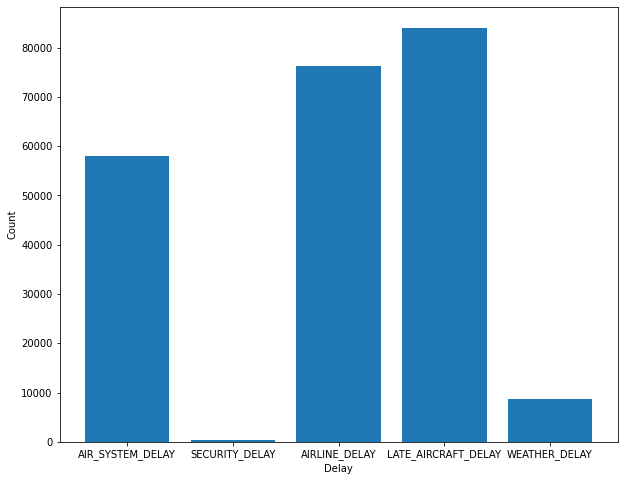

In [12]:
plt.figure(figsize=(10,8))
plt.bar(col_names, lst)
plt.xlabel("Delay")
plt.ylabel("Count")
plt.show()

# Notes

- The bar chart above illustrates the count of flight affected by each delay reason.
- As we see LATE_AIRCRAFT_DELAY and AIRLINE_DELAY contributed the most in flight delays.

# Plot the time of each delay in hours

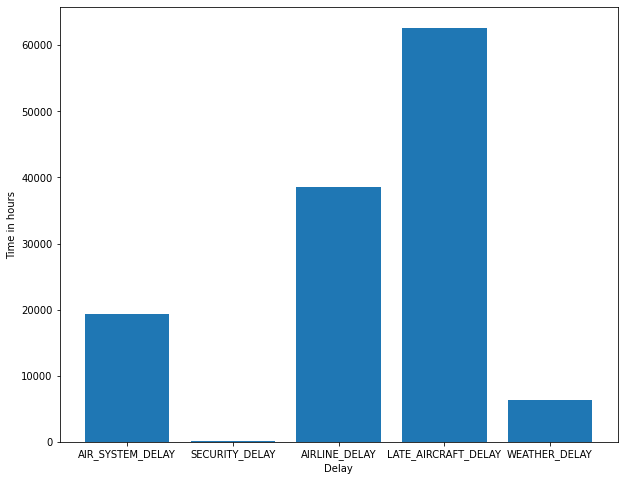

In [13]:
plt.figure(figsize=(10,8))
plt.bar(col_names, lst_3)
plt.xlabel("Delay")
plt.ylabel("Time in hours")
plt.show()

# Notes

- The chart above demonstrates the sum of hours each delay reason contributed to flight delays.
- LATE_AIRCRAFT_DELAY was more critical with the highest sum of hours delayed.

# Boxplot

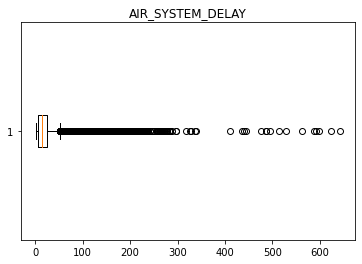

In [14]:
plt.boxplot(df[df[col_names[0]]>0][col_names[0]].values,vert=False)
plt.title(col_names[0])
plt.show()

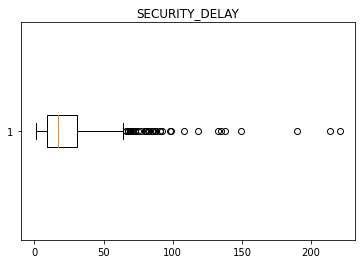

In [15]:
plt.boxplot(df[df[col_names[1]]>0][col_names[1]].values,vert=False)
plt.title(col_names[1])
plt.show()

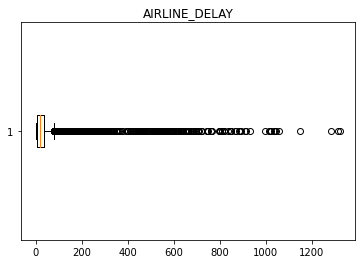

In [16]:
plt.boxplot(df[df[col_names[2]]>0][col_names[2]].values,vert=False)
plt.title(col_names[2])
plt.show()

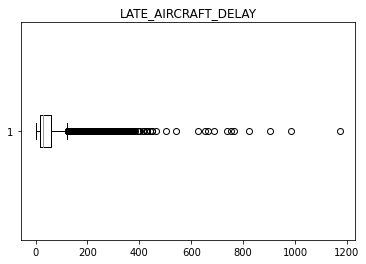

In [17]:
plt.boxplot(df[df[col_names[3]]>0][col_names[3]].values,vert=False)
plt.title(col_names[3])
plt.show()

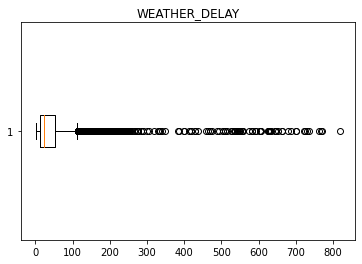

In [18]:
plt.boxplot(df[df[col_names[4]]>0][col_names[4]].values,vert=False)
plt.title(col_names[4])
plt.show()

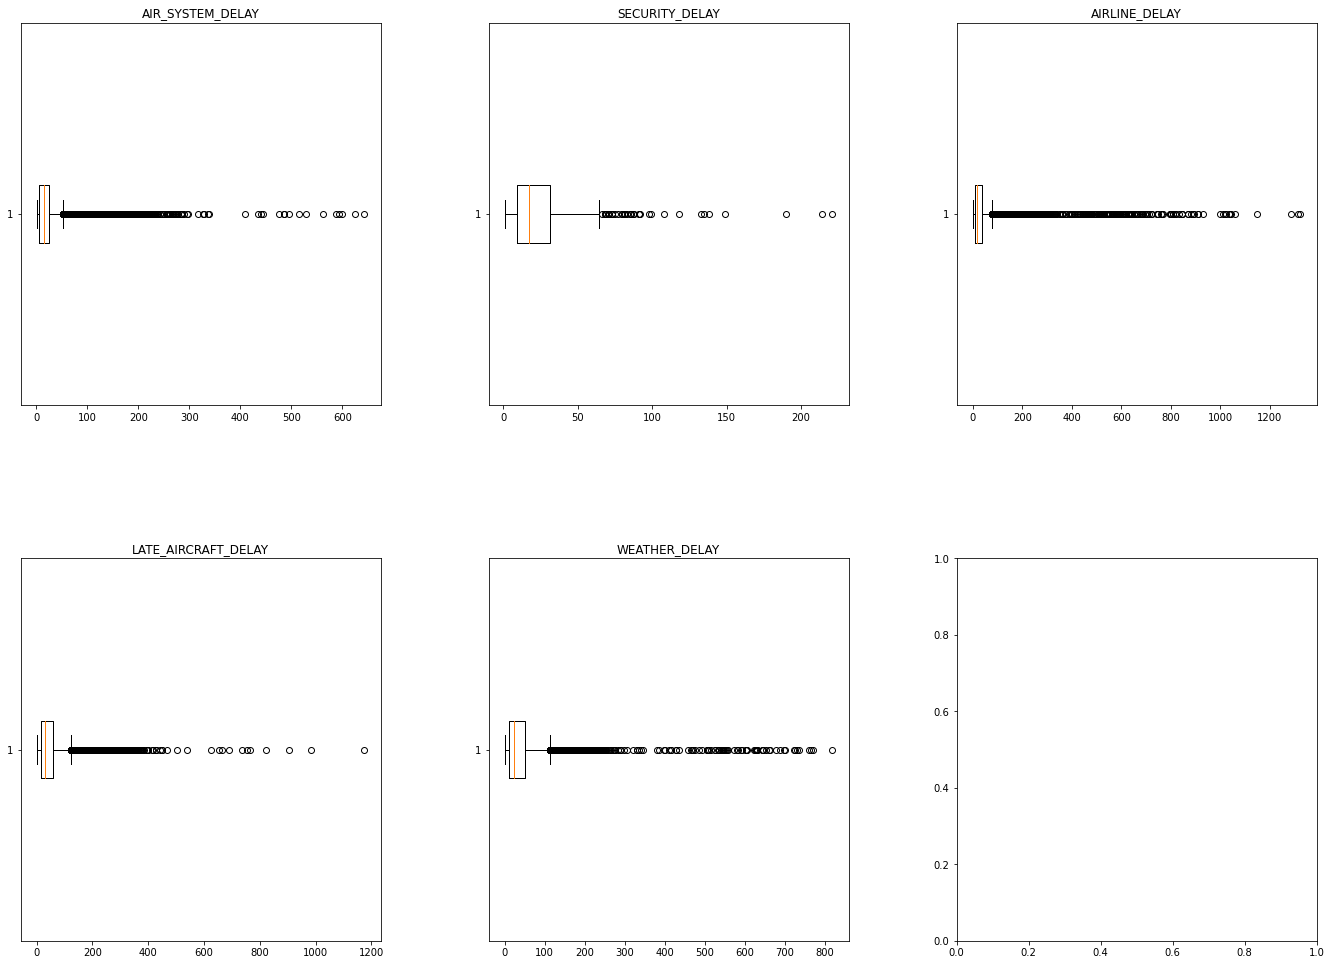

In [27]:
fig, axs = plt.subplots(2, 3,figsize=(20,15))

# basic plot
axs[0, 0].boxplot(df[df[col_names[0]]>0][col_names[0]].values, vert= False)
axs[0, 0].set_title(col_names[0])

# notched plot
axs[0, 1].boxplot(df[df[col_names[1]]>0][col_names[1]].values, vert= False)
axs[0, 1].set_title(col_names[1])

# change outlier point symbols
axs[0, 2].boxplot(df[df[col_names[2]]>0][col_names[2]].values, vert= False)
axs[0, 2].set_title(col_names[2])

# don't show outlier points
axs[1, 0].boxplot(df[df[col_names[3]]>0][col_names[3]].values, vert= False)
axs[1, 0].set_title(col_names[3])

# horizontal boxes
axs[1, 1].boxplot(df[df[col_names[4]]>0][col_names[4]].values,vert= False)
axs[1, 1].set_title(col_names[4])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

In [34]:
def clamp_outliers(df,num_cols):
        for col in num_cols:
            Q1=np.quantile(df[col],0.25)
            Q3=np.quantile(df[col],0.75)
            IQR= Q3-Q1
            lower_bounder=Q1-(1.5*IQR)
            high_bounder= Q3+(1.5*IQR)
            lst=df.index[df[col]<lower_bounder | df[col]>high_bounder ]
        return lst

In [39]:
def get_index(df,col):
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3 -Q1
    lower_bounder=Q1-(1.5*IQR)
    high_bounder= Q3+(1.5*IQR)
    lst=df.index[(df[col]<lower_bounder) | (df[col]>high_bounder) ]
    return lst
    

In [40]:
index_lst=[]
for col in col_names:
    index_lst.extend(get_index(df,col))

In [42]:
def remove_outliers(df,lst):
    lst= sorted(set(lst))
    df= df.drop(lst)
    return df

In [43]:
df=remove_outliers(df,index_lst)

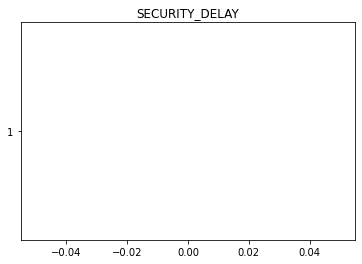

In [47]:
plt.boxplot(df[col_names[1]].values,vert=False)
plt.title(col_names[1])
plt.show()

In [49]:
df[col_names[1]].unique()

array([ 0., nan])

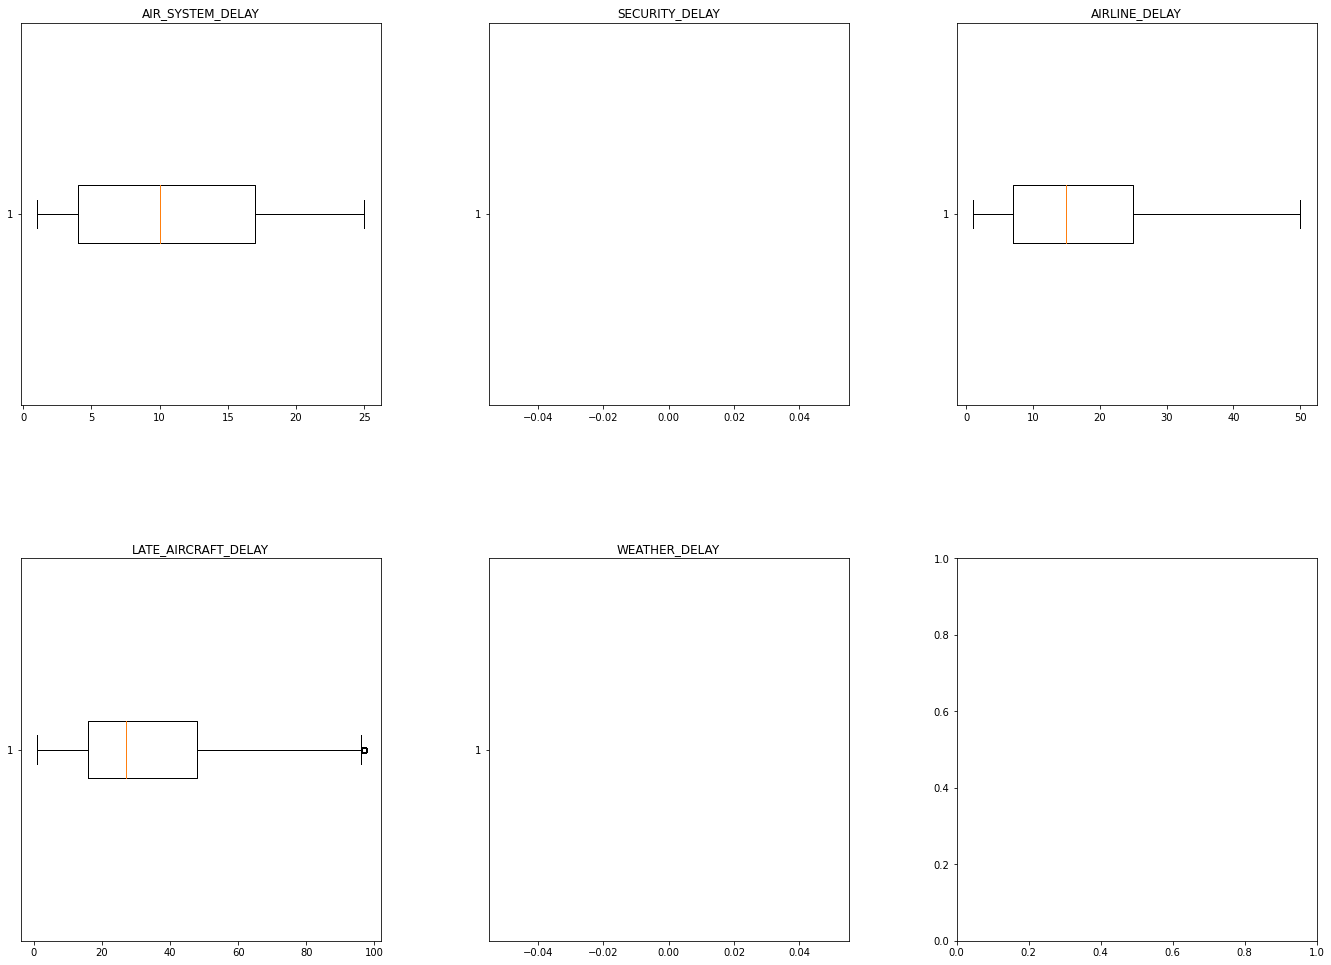

In [44]:
fig, axs = plt.subplots(2, 3,figsize=(20,15))

# basic plot
axs[0, 0].boxplot(df[df[col_names[0]]>0][col_names[0]].values, vert= False)
axs[0, 0].set_title(col_names[0])

# notched plot
axs[0, 1].boxplot(df[df[col_names[1]]>0][col_names[1]].values, vert= False)
axs[0, 1].set_title(col_names[1])

# change outlier point symbols
axs[0, 2].boxplot(df[df[col_names[2]]>0][col_names[2]].values, vert= False)
axs[0, 2].set_title(col_names[2])

# don't show outlier points
axs[1, 0].boxplot(df[df[col_names[3]]>0][col_names[3]].values, vert= False)
axs[1, 0].set_title(col_names[3])

# horizontal boxes
axs[1, 1].boxplot(df[df[col_names[4]]>0][col_names[4]].values,vert= False)
axs[1, 1].set_title(col_names[4])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

## '#' Notes

- In this insights we find LATE_AIRCRAFT_DELAY feature is the largest effect of those features then AIRLINE_DELAY 
- However if the question requires calculate the significant of those five features on the flight delay then a dependent variable like "delay status" will be required, however it is not available in provided dataset

---------------

$$ Submitted \space by: \space Ahmed \space Azzam $$